In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Importação dos dados

Os dados foram retirados da plataforma Kaggle. https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr

O objetivo desse projeto é analisar e classificar sentimentos em relação aos filmes a partir dos comentários.

In [2]:
dados = pd.read_csv('imdb-reviews-pt-br.csv')
dados.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
dados.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [4]:
dados.sentiment = dados.sentiment.replace(['neg','pos'],[0,1])

In [5]:
dados.sentiment.value_counts()

0    24765
1    24694
Name: sentiment, dtype: int64

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
SEED = 42

In [17]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

    X_train, X_test, y_train, y_test = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=SEED)

    regressao= LogisticRegression(solver='lbfgs')
    regressao.fit(X_train, y_train)
    acuracia = regressao.score(X_test,y_test)
    return acuracia
    

In [18]:
classificar_texto(dados,'text_pt','sentiment')

0.6689041649818035

In [20]:
pip install wordcloud

     -------------------------------------- 152.9/152.9 KB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\pichau\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [21]:
from wordcloud import WordCloud

In [26]:
len(todas_palavras)

63448424

In [32]:
import matplotlib.pyplot as plt

In [38]:
def nuvem_negativa(texto, coluna_texto):
    texto_negativo = dados.query('sentiment == 0')
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800,height=500, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,10))
    plt.imshow(nuvem_palavras)
    plt.axis('off')
    plt.show()

In [42]:
def nuvem_positivo(texto, coluna_texto):
    texto_positivo = dados.query('sentiment == 1')
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800,height=500, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,10))
    plt.imshow(nuvem_palavras)
    plt.axis('off')
    plt.show()

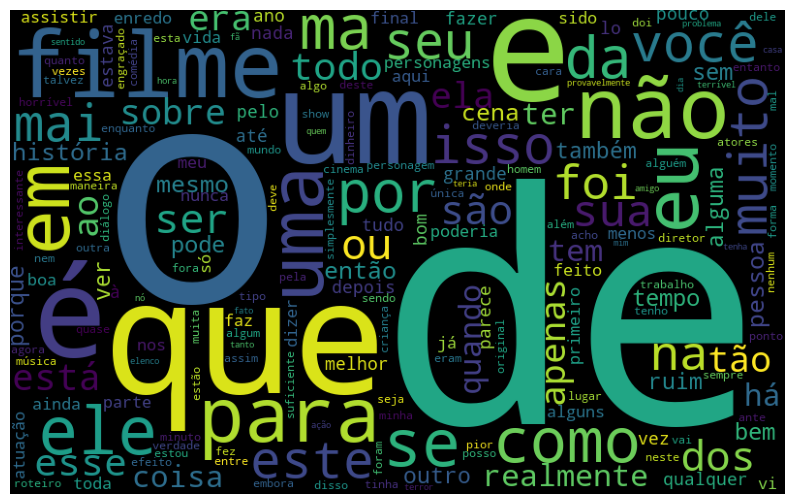

In [40]:
nuvem_negativa(dados, 'text_pt')

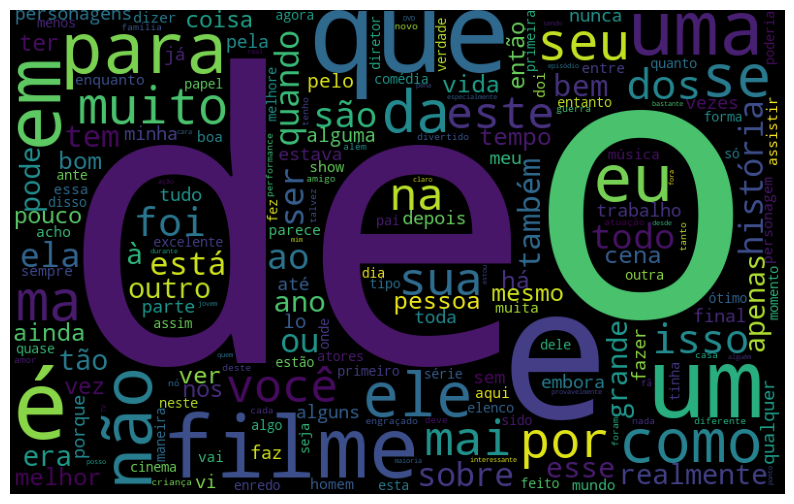

In [43]:
nuvem_positivo(dados, 'text_pt')

In [46]:
import nltk
from nltk import tokenize

In [83]:
token = tokenize.WordPunctTokenizer()
token_frase = token.tokenize(todas_palavras)

In [49]:
frequencia = nltk.FreqDist(token_frase)

In [59]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),'Frequencia':list(frequencia.values())}).sort_values(by='Frequencia', ascending=False)
df_frequencia

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
...,...,...
202546,Delvian;,1
202548,Henson;,1
202549,FarScape,1
49483,Ghencea.,1


In [55]:
import seaborn as sns

<AxesSubplot:xlabel='Palavra', ylabel='Frequencia'>

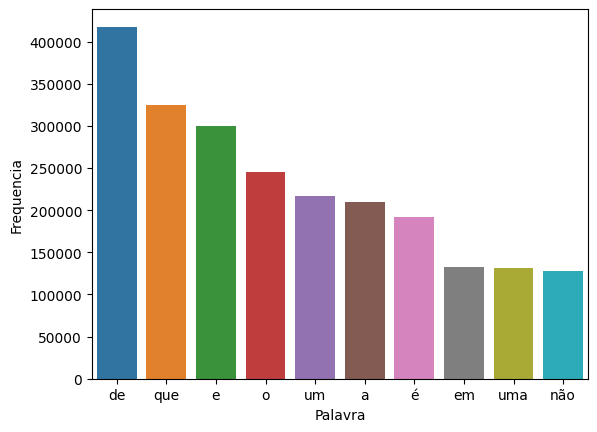

In [60]:
sns.barplot(x=df_frequencia['Palavra'][:10],y=df_frequencia['Frequencia'][:10], data= df_frequencia)

In [64]:
nltk.download('stopwords')
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
len(palavras_irrelevantes)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PICHAU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


207

In [65]:
frase_processada = []
for opniao in dados.text_pt:
    nova_frase = []
    palavras_texto = token.tokenize(opniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

dados['tratamento_1'] = frase_processada

In [67]:
dados.head()

,id,text_en,text_pt,sentiment,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [68]:
classificar_texto(dados, 'tratamento_1', 'sentiment')

0.6646987464617873

In [71]:
from string import punctuation

In [75]:
pontuacao = [ponto for ponto in punctuation]
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [79]:
pontuacao_stopwords = palavras_irrelevantes + pontuacao

In [80]:
pontuacao_stopwords

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [84]:
frase_processada = []
for opniao in dados.tratamento_1:
    nova_frase = []
    palavras_texto = token.tokenize(opniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

dados['tratamento_2'] = frase_processada

In [87]:
dados.tratamento_1[0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [88]:
dados.tratamento_2[0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

In [90]:
pip install unidecode

You should consider upgrading via the 'c:\users\pichau\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 235.9/235.9 KB 7.3 MB/s eta 0:00:00


In [91]:
import unidecode

In [92]:
sem_acentos = [unidecode.unidecode(texto) for texto in dados.tratamento_2]

In [93]:
stop_words_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [99]:
dados['tratamento_3'] = sem_acentos
frase_processada = []
for opniao in dados.tratamento_3:
    nova_frase = []
    palavras_texto = token.tokenize(opniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

dados['tratamento_3'] = frase_processada

In [100]:
dados.tratamento_2[0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

In [101]:
dados.tratamento_3[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [102]:
acuracia_tratamento3 = classificar_texto(dados, 'tratamento_3', 'sentiment')
acuracia_tratamento3

0.6592802264456126

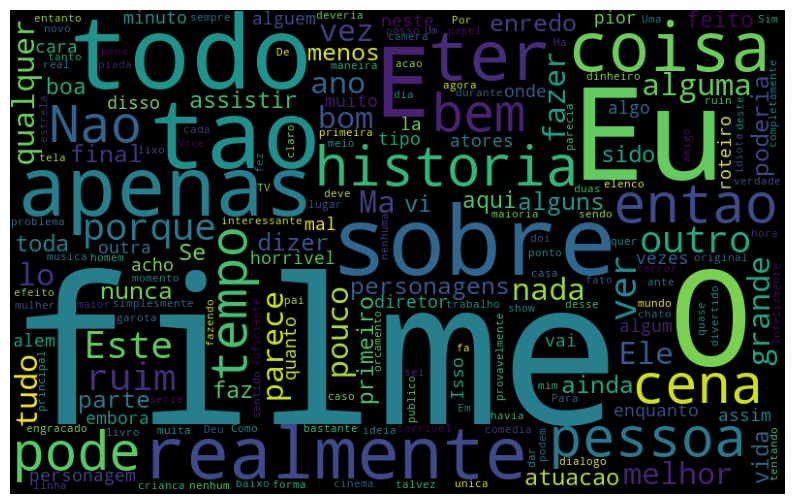

In [103]:
nuvem_negativa(dados,'tratamento_3')

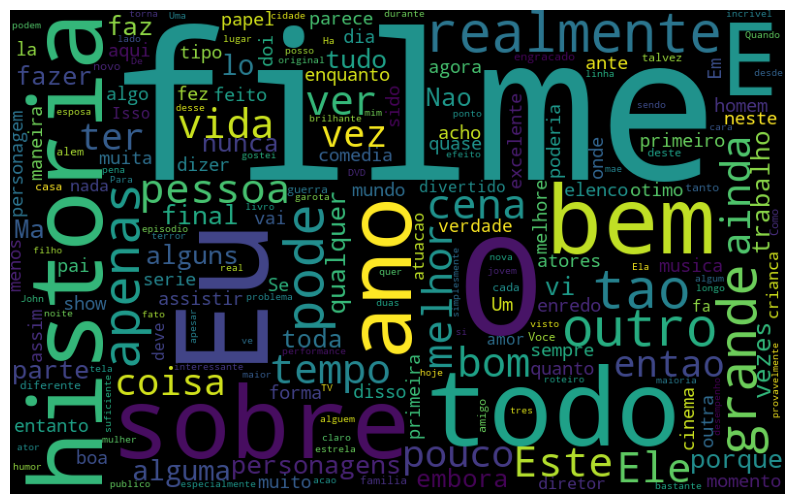

In [104]:
nuvem_positivo(dados,'tratamento_3')

In [105]:
frase_processada = []
for opniao in dados.tratamento_3:
    nova_frase = []
    opniao = opniao.lower()
    palavras_texto = token.tokenize(opniao)
    for palavra in palavras_texto:
        if palavra not in stop_words_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

dados['tratamento_4'] = frase_processada

In [106]:
dados.text_pt[0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [107]:
dados.tratamento_4[0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [108]:
acuracia_tratamento4 = classificar_texto(dados, 'tratamento_4', 'sentiment')
acuracia_tratamento4

0.6874241811564901

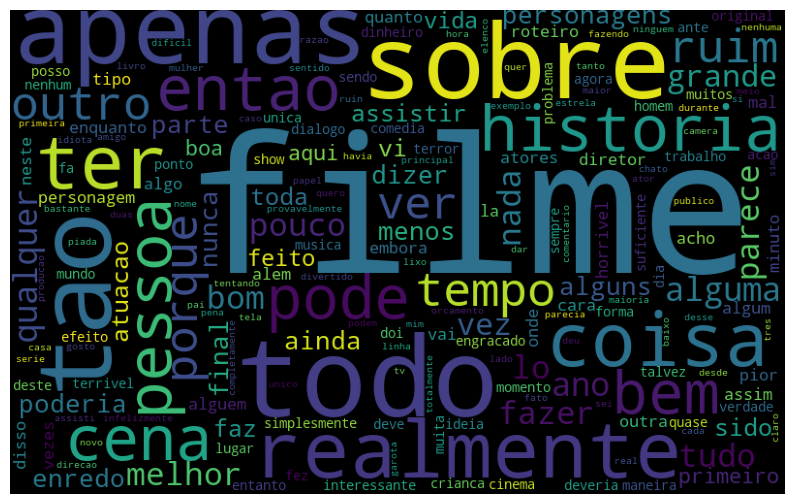

In [109]:
nuvem_negativa(dados,'tratamento_4')

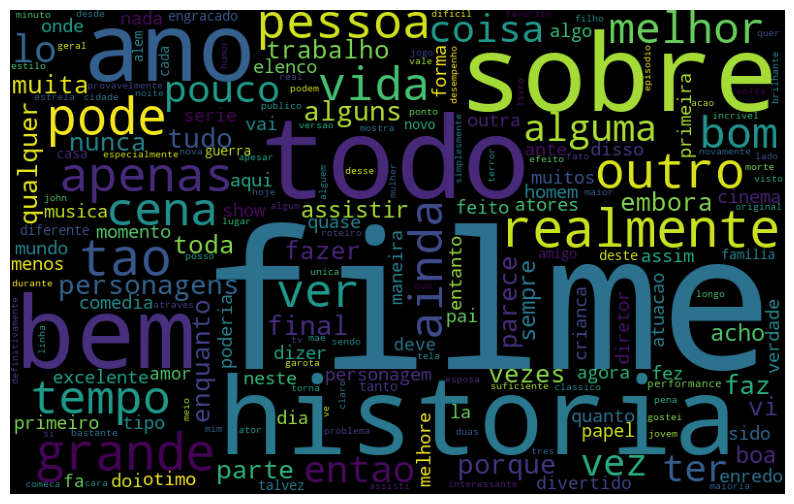

In [110]:
nuvem_positivo(dados,'tratamento_4')

In [112]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\PICHAU\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


True

In [113]:
stemmer = nltk.RSLPStemmer()

frase_processada = []
for opniao in dados.tratamento_4:
    nova_frase = []
    palavras_texto = token.tokenize(opniao)
    for palavra in palavras_texto:
        if palavra not in stop_words_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

dados['tratamento_5'] = frase_processada

In [114]:
acuracia_tratamento5 = classificar_texto(dados, 'tratamento_5', 'sentiment')
acuracia_tratamento5

0.6954306510311363

In [115]:
dados[['text_pt','tratamento_5']].head()

,text_pt,tratamento_5
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",vez sr costn arrum film temp necessari alem te...
1,Este é um exemplo do motivo pelo qual a maiori...,exempl motiv maior film aca mesm gener chat na...
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",prim tud odei rap imbecil pod agir arm pressio...
3,Nem mesmo os Beatles puderam escrever músicas ...,beatl pud escrev music tod gost emb walt hill ...
4,Filmes de fotos de latão não é uma palavra apr...,film fot lata palavr apropri verdad tant ous q...


In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
tfidf_bruto = tfidf.fit_transform(dados["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, dados["sentiment"], random_state = 42)

regressao.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [120]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
tfidf_bruto = tfidf.fit_transform(dados["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, dados["sentiment"], random_state = 42)

regressao.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6963202587949858


In [122]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(dados["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, dados["sentiment"], random_state = 42)

regressao.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8856449656287909


In [126]:
pesos = pd.DataFrame(regressao.coef_[0].T, index=tfidf.get_feature_names())
pesos.nlargest(10,0)

c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
otim,9.905861
excel,9.008890
perfeit,6.899348
maravilh,6.287748
favorit,5.890854
incri,5.762413
divert,5.386765
brilh,4.857927
ador,4.575856
hoj,4.492844


In [127]:
pesos.nsmallest(10,0)

,0
ruim,-11.783101
pi,-11.462566
horri,-9.725877
terri,-8.404179
nad,-7.623785
chat,-7.517419
parec,-6.881806
nenhum,-6.380778
tent,-5.955765
mal,-5.712541
